___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers. 
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***), **Deep Learning algorithms** and **BERT algorithm**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information. 
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones. 
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning and BERT model***.

Classically, you can start to know the data after doing the import and load operations. 
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words 
- Create Word Cloud 


#### 5. Sentiment Classification with Machine Learning, Deep Learning and BERT Model

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Learning Model
- BERT Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: ML algorithms(Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting), Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews. 


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [242]:
import numpy as np
import pandas as pd
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv', encoding="utf-8")
df = pd.read_csv('/content/drive/MyDrive/clarusway-dl/Womens Clothing E-Commerce Reviews.csv', encoding="utf-8")

### Data Wrangling

In [4]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [5]:
df.shape

(23486, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [7]:
df.isna().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [8]:
df[df['Title'].isna and df['Review Text'].isna()]

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
92,92,861,23,NaN,NaN,5,1,0,General Petite,Tops,Knits
93,93,1081,31,NaN,NaN,5,1,0,General,Dresses,Dresses
98,98,1133,50,NaN,NaN,5,1,0,General,Jackets,Outerwear
135,135,861,35,NaN,NaN,4,1,0,General Petite,Tops,Knits
142,142,1126,35,NaN,NaN,5,1,0,General,Jackets,Outerwear
...,...,...,...,...,...,...,...,...,...,...,...
23258,23258,862,35,NaN,NaN,4,1,0,General,Tops,Knits
23301,23301,862,52,NaN,NaN,5,1,0,General,Tops,Knits
23303,23303,823,46,NaN,NaN,5,1,0,General,Tops,Blouses
23470,23470,1104,39,NaN,NaN,5,1,0,General Petite,Dresses,Dresses


In [9]:
df[df['Title'].isna and df['Review Text'].isna()]['Recommended IND'].value_counts()

1    774
0     71
Name: Recommended IND, dtype: int64

In [10]:
df.shape

(23486, 11)

In [11]:
df.drop(index=df[df['Title'].isna and df['Review Text'].isna()].index, inplace = True)

In [12]:
df.duplicated().sum()

0

In [13]:
df.reset_index(drop=True,inplace=True)

In [14]:
df.shape

(22641, 11)

In [15]:
df.isna().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      2966
Review Text                   0
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                13
Department Name              13
Class Name                   13
dtype: int64

In [16]:
def concat_title_review(row):
    if pd.notnull(row['Title']):
        return row['Title'] + ': ' + row['Review Text']
    else:
        return row['Review Text']

# apply the function to each row of the dataframe
df['text'] = df.apply(concat_title_review, axis=1)

In [17]:
df.text

0        Absolutely wonderful - silky and sexy and comf...
1        Love this dress!  it's sooo pretty.  i happene...
2        Some major design flaws: I had such high hopes...
3        My favorite buy!: I love, love, love this jump...
4        Flattering shirt: This shirt is very flatterin...
                               ...                        
22636    Great dress for many occasions: I was very hap...
22637    Wish it was made of cotton: It reminds me of m...
22638    Cute, but see through: This fit well, but the ...
22639    Very cute dress, perfect for summer parties an...
22640    Please make more like this one!: This dress in...
Name: text, Length: 22641, dtype: object

#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

In [18]:
df['Recommended IND'].value_counts()

1    18540
0     4101
Name: Recommended IND, dtype: int64

In [19]:
df['Recommended IND'].value_counts(normalize=  True)

1    0.818868
0    0.181132
Name: Recommended IND, dtype: float64

## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [20]:
df = df.loc[:,['text','Recommended IND']]

In [21]:
df.sample(1)

,text,Recommended IND
8616,Unflattering: I own many blouses by tiny. the ...,0


In [22]:
df.rename(columns = {'Recommended IND': 'recommended','text':'review'}, inplace=True)

In [23]:
df.recommended = df.recommended.map({1:0, 0:1})

---
---


### Missing Value Detection

In [24]:
df.isna().sum()

review         0
recommended    0
dtype: int64

---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma). 
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method. 


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [25]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [26]:
from nltk.corpus import stopwords
stop_words = stopwords.words("english")

In [27]:
def cleaning_fsa(data):
    
    #1. removing upper brackets to keep negative auxiliary verbs in text
    text = data.replace("'",'')
         
    #2. Tokenize and lower
    text_tokens = word_tokenize(text.lower()) 
    
    #3. Remove punkt and numbers
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    #4. Removing Stopwords     
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #5. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
    #6. joining
    return " ".join(text_cleaned)

In [28]:
df0 = df.copy()

In [29]:
df["review"] = df["review"].apply(cleaning_fsa)

## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words 
- Create Word Cloud 


### Detect Reviews (positive and negative separately)

In [30]:
from wordcloud import WordCloud


In [31]:
positive_reviews = df[df.recommended == 0].review

In [32]:
negative_reviews = df[df.recommended == 1].review

### Collect Words (positive and negative separately)

In [33]:
all_positive_words = " ".join(positive_reviews)

In [34]:
all_negative_words = " ".join(negative_reviews)

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [35]:
wordcloud = WordCloud(background_color="white", max_words =250, scale=10)

In [36]:
wordcloud.generate(all_positive_words)

# generate komutu ile yukarda verdiğimiz talimatlara göre datamızda en sık geçen ilk 250 token belirlenir.

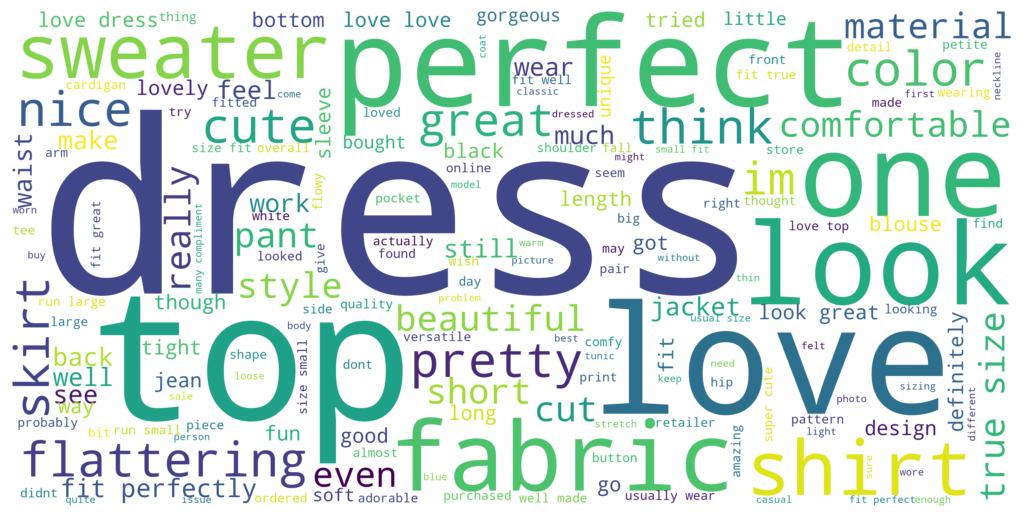

In [37]:
import matplotlib.pyplot as plt # görselliştirmek için matplotlib kütüphanesi kullanılıyor.
plt.figure(figsize = (13,13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [38]:
wordcloud = WordCloud(background_color="white", max_words =250, scale =10)

In [39]:
wordcloud.generate(all_negative_words)

# generate komutu ile yukarda verdiğimiz talimatlara göre datamızda en sık geçen ilk 250 token belirlenir.

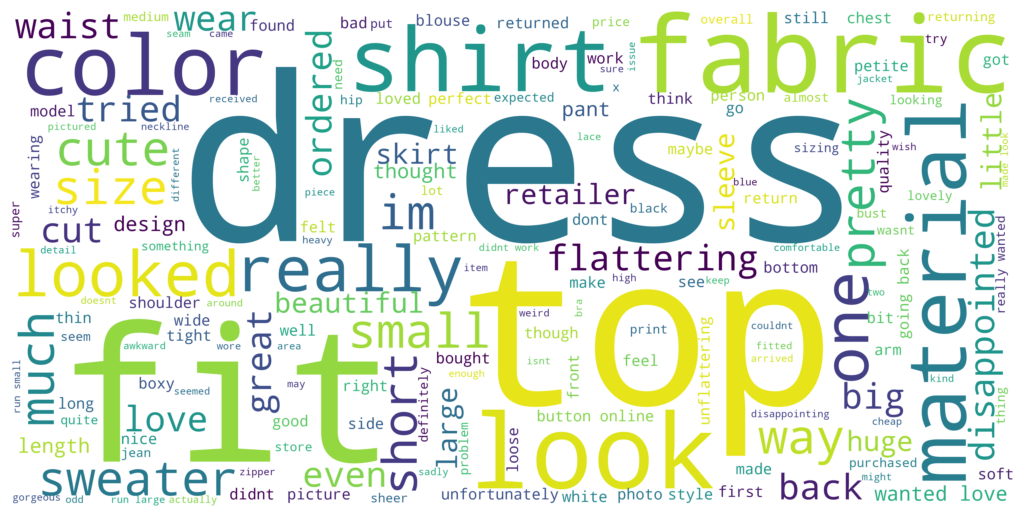

In [40]:
import matplotlib.pyplot as plt # görselliştirmek için matplotlib kütüphanesi kullanılıyor.
plt.figure(figsize = (13,13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## 5. Sentiment Classification with Machine Learning, Deep Learning and BERT model

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.** 

**For BERT model, use TF tensor**

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model
- BERT Model

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [41]:
df.sample(1)

,review,recommended
14625,new love jacket work well business casual outf...,0


In [42]:
!pip install --upgrade numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X = df["review"]
y = df["recommended"]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [46]:
from sklearn.feature_extraction.text import CountVectorizer

In [47]:
vectorizer = CountVectorizer(min_df=3, max_df=0.9) # ngram_range=(1,3), max_features= 1500, preprocessor=cleaning_fsa, 
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [48]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names_out())

,ab,abby,abdomen,ability,able,abo,abroad,absolute,absolutely,abstract,...,zero,zig,zigzag,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18107,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18108,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18109,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18110,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### TF-IDF

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [50]:
tf_idf_vectorizer = TfidfVectorizer(min_df=3, max_df=0.9) # preprocessor=cleaning, 
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [51]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names_out())

,ab,abby,abdomen,ability,able,abo,abroad,absolute,absolutely,abstract,...,zero,zig,zigzag,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.290903
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.153548,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
18108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
18109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
18110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.249439,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


### Eval Function

In [52]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score

In [53]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))
    

## Logistic Regression

### CountVectorizer

In [54]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C = 0.02, max_iter=1000, class_weight='balanced') #class_weight='balanced'
log.fit(X_train_count,y_train)

LogisticRegression(C=0.02, class_weight='balanced', max_iter=1000)

In [55]:
print("LOG MODEL")
eval(log, X_train_count, X_test_count)

LOG MODEL
[[3233  476]
 [ 106  714]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.87      0.92      3709
           1       0.60      0.87      0.71       820

    accuracy                           0.87      4529
   macro avg       0.78      0.87      0.81      4529
weighted avg       0.90      0.87      0.88      4529

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.88      0.93     14831
           1       0.63      0.91      0.74      3281

    accuracy                           0.89     18112
   macro avg       0.80      0.90      0.84     18112
weighted avg       0.91      0.89      0.89     18112



In [56]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

scoring = {'accuracy': make_scorer(accuracy_score),
            'precision': make_scorer(precision_score, average=None, labels=[1]),
            'recall': make_scorer(recall_score, average=None, labels = [1]),
            'f1': make_scorer(f1_score, average=None, labels = [1])}


model = LogisticRegression(C = 0.02, max_iter=1000,class_weight='balanced')
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.869203
train_accuracy     0.886668
test_precision     0.596241
train_precision    0.629150
test_recall        0.862545
train_recall       0.911917
test_f1            0.704986
train_f1           0.744590
dtype: float64

In [57]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


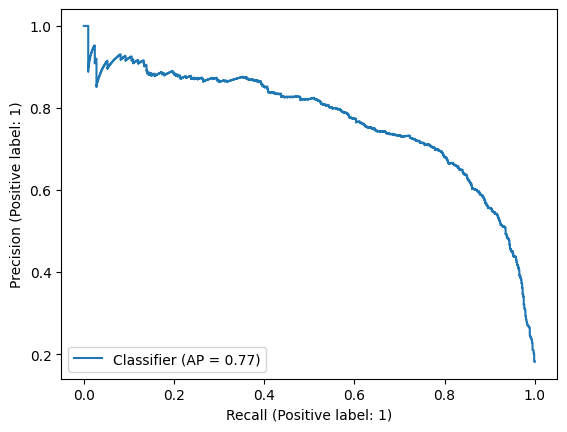

In [58]:
from scikitplot.metrics import plot_roc, plot_precision_recall
from sklearn.metrics import PrecisionRecallDisplay

model = LogisticRegression(C = 0.02, max_iter=1000, class_weight='balanced')

model.fit(X_train_count, y_train)

y_pred_proba = model.predict_proba(X_test_count)
    
PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba[:, 1])
plt.show();

In [59]:
from sklearn.metrics import average_precision_score

y_test_dummies = pd.get_dummies(y_test)

y_pred = log.predict(X_test_count)
log_count_rec = recall_score(y_test, y_pred, labels = [1], average = None)
log_count_f1= f1_score(y_test, y_pred, labels = [1], average = None)
log_AP = average_precision_score(y_test_dummies[1], y_pred_proba[:, 1])

### TF-IDF

In [60]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C = 0.02, max_iter=1000, class_weight='balanced') #class_weight='balanced'
log.fit(X_train_tf_idf,y_train)

LogisticRegression(C=0.02, class_weight='balanced', max_iter=1000)

In [61]:
print("LOG MODEL")
eval(log, X_train_tf_idf, X_test_tf_idf)

LOG MODEL
[[3097  612]
 [ 102  718]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.83      0.90      3709
           1       0.54      0.88      0.67       820

    accuracy                           0.84      4529
   macro avg       0.75      0.86      0.78      4529
weighted avg       0.89      0.84      0.86      4529

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.84      0.90     14831
           1       0.56      0.89      0.69      3281

    accuracy                           0.85     18112
   macro avg       0.76      0.87      0.79     18112
weighted avg       0.90      0.85      0.86     18112



In [62]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

scoring = {'accuracy': make_scorer(accuracy_score),
            'precision': make_scorer(precision_score, average=None, labels=[1]),
            'recall': make_scorer(recall_score, average=None, labels = [1]),
            'f1': make_scorer(f1_score, average=None, labels = [1])}


model = LogisticRegression(C = 0.02, max_iter=1000,class_weight='balanced')
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.844910
train_accuracy     0.851701
test_precision     0.544984
train_precision    0.556556
test_recall        0.873515
train_recall       0.892343
test_f1            0.671144
train_f1           0.685538
dtype: float64

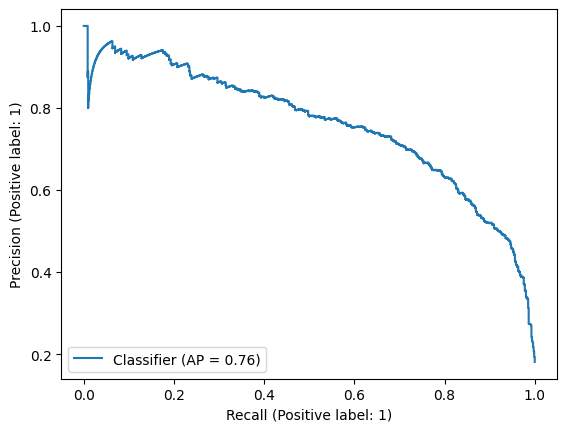

In [63]:
from scikitplot.metrics import plot_roc, plot_precision_recall
from sklearn.metrics import PrecisionRecallDisplay

model = LogisticRegression(C = 0.02, max_iter=1000, class_weight='balanced')

model.fit(X_train_tf_idf, y_train)

y_pred_proba = model.predict_proba(X_test_tf_idf)
    
PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba[:, 1])
plt.show();

In [64]:
from sklearn.metrics import average_precision_score

y_test_dummies = pd.get_dummies(y_test)

y_pred = log.predict(X_test_tf_idf)
log_tf_idf_rec = recall_score(y_test, y_pred, labels = [1], average = None)
log_tf_idf_f1= f1_score(y_test, y_pred, labels = [1], average = None)
log_tf_idf_AP = average_precision_score(y_test_dummies[1], y_pred_proba[:, 1])

## Naive Bayes 

### Countvectorizer

In [65]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB # BernoulliNB for binary model

In [66]:
nb = BernoulliNB(alpha=1)
nb.fit(X_train_count,y_train)

BernoulliNB(alpha=1)

In [67]:
print("NB MODEL")
eval(nb, X_train_count, X_test_count)

NB MODEL
[[3392  317]
 [ 179  641]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      3709
           1       0.67      0.78      0.72       820

    accuracy                           0.89      4529
   macro avg       0.81      0.85      0.83      4529
weighted avg       0.90      0.89      0.89      4529

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.92      0.94     14831
           1       0.70      0.83      0.76      3281

    accuracy                           0.90     18112
   macro avg       0.83      0.87      0.85     18112
weighted avg       0.91      0.90      0.91     18112



In [68]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

model = BernoulliNB(alpha=1)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.885545
train_accuracy     0.905127
test_precision     0.655770
train_precision    0.703024
test_recall        0.775672
train_recall       0.824647
test_f1            0.710605
train_f1           0.758991
dtype: float64

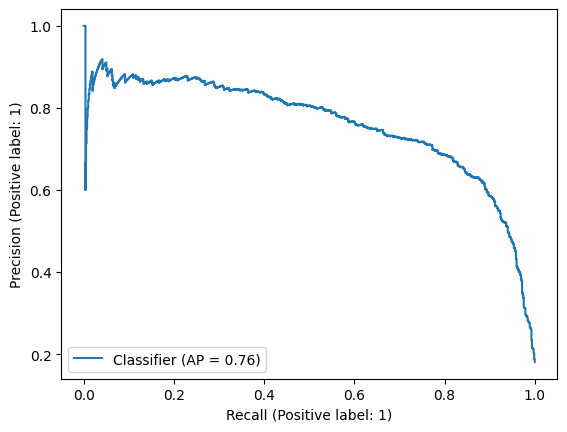

In [69]:
from scikitplot.metrics import plot_roc, plot_precision_recall


model = MultinomialNB(alpha=1)

model.fit(X_train_count, y_train)

y_pred_proba = model.predict_proba(X_test_count)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba[:, 1])
plt.show();

In [70]:
from sklearn.metrics import average_precision_score


y_pred = nb.predict(X_test_count)
nb_count_rec = recall_score(y_test, y_pred, labels = [1], average = None)
nb_count_f1 = f1_score(y_test, y_pred, labels = [1], average = None)
nb_AP = average_precision_score(y_test_dummies[1], y_pred_proba[:, 1])

### TF-IDF

In [71]:
nb = BernoulliNB(alpha=1)
nb.fit(X_train_tf_idf,y_train)

BernoulliNB(alpha=1)

In [72]:
print("NB MODEL")
eval(nb, X_train_tf_idf, X_test_tf_idf)

NB MODEL
[[3392  317]
 [ 179  641]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      3709
           1       0.67      0.78      0.72       820

    accuracy                           0.89      4529
   macro avg       0.81      0.85      0.83      4529
weighted avg       0.90      0.89      0.89      4529

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.92      0.94     14831
           1       0.70      0.83      0.76      3281

    accuracy                           0.90     18112
   macro avg       0.83      0.87      0.85     18112
weighted avg       0.91      0.90      0.91     18112



In [73]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

model = BernoulliNB(alpha=1)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.885545
train_accuracy     0.905127
test_precision     0.655770
train_precision    0.703024
test_recall        0.775672
train_recall       0.824647
test_f1            0.710605
train_f1           0.758991
dtype: float64

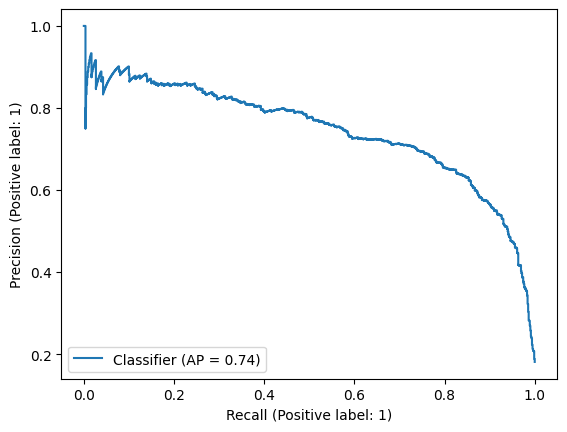

In [74]:
from scikitplot.metrics import plot_roc, plot_precision_recall


model = BernoulliNB(alpha=1)

model.fit(X_train_tf_idf, y_train)

y_pred_proba = model.predict_proba(X_test_count)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba[:, 1])
plt.show();

In [75]:
from sklearn.metrics import average_precision_score


y_pred = nb.predict(X_test_tf_idf)
nb_tf_idf_rec = recall_score(y_test, y_pred, labels = [1], average = None)
nb_tf_idf_f1 = f1_score(y_test, y_pred, labels = [1], average = None)
nb_tf_idf_AP = average_precision_score(y_test_dummies[1], y_pred_proba[:, 1])

## Support Vector Machine (SVM)

### Countvectorizer

In [76]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=0.01, class_weight='balanced')
svc.fit(X_train_count,y_train)

LinearSVC(C=0.01, class_weight='balanced')

In [77]:
print("SVC MODEL")
eval(svc, X_train_count, X_test_count)

SVC MODEL
[[3274  435]
 [ 103  717]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.88      0.92      3709
           1       0.62      0.87      0.73       820

    accuracy                           0.88      4529
   macro avg       0.80      0.88      0.83      4529
weighted avg       0.91      0.88      0.89      4529

Train_Set
              precision    recall  f1-score   support

           0       0.99      0.90      0.94     14831
           1       0.68      0.94      0.79      3281

    accuracy                           0.91     18112
   macro avg       0.84      0.92      0.87     18112
weighted avg       0.93      0.91      0.92     18112



In [78]:
model = LinearSVC(C=0.01)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.899625
train_accuracy     0.926642
test_precision     0.785977
train_precision    0.864475
test_recall        0.613542
train_recall       0.705679
test_f1            0.688825
train_f1           0.777044
dtype: float64

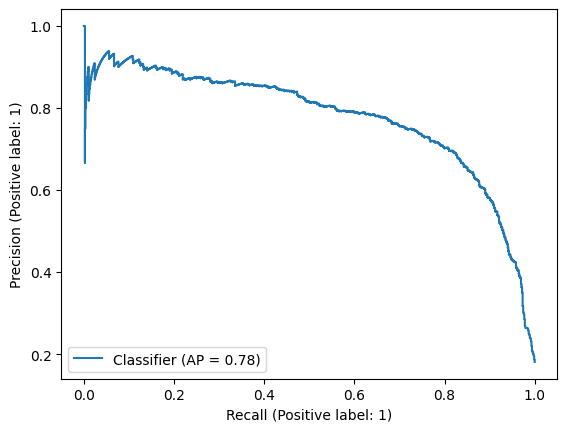

In [79]:
from scikitplot.metrics import plot_roc, plot_precision_recall


model = LinearSVC(C=0.01, class_weight='balanced')

model.fit(X_train_count, y_train)

decision_function = model.decision_function(X_test_count)
    
PrecisionRecallDisplay.from_predictions(y_test, decision_function)
plt.show();

In [80]:
y_pred = svc.predict(X_test_count)
svc_count_rec = recall_score(y_test, y_pred, labels = [1], average = None)
svc_count_f1 = f1_score(y_test, y_pred, labels = [1], average = None)
svc_AP = average_precision_score(y_test_dummies[1], decision_function)

### TD-IDF

In [81]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=0.01, class_weight='balanced')
svc.fit(X_train_tf_idf,y_train)

LinearSVC(C=0.01, class_weight='balanced')

In [82]:
print("SVC MODEL")
eval(svc, X_train_tf_idf, X_test_tf_idf)

SVC MODEL
[[3170  539]
 [  91  729]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.85      0.91      3709
           1       0.57      0.89      0.70       820

    accuracy                           0.86      4529
   macro avg       0.77      0.87      0.80      4529
weighted avg       0.90      0.86      0.87      4529

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.86      0.92     14831
           1       0.60      0.91      0.72      3281

    accuracy                           0.87     18112
   macro avg       0.79      0.89      0.82     18112
weighted avg       0.91      0.87      0.88     18112



In [83]:
model = LinearSVC(C=0.01, class_weight='balanced')
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.880798
train_accuracy     0.912287
test_precision     0.626084
train_precision    0.688051
test_recall        0.850662
train_recall       0.943649
test_f1            0.721181
train_f1           0.795827
dtype: float64

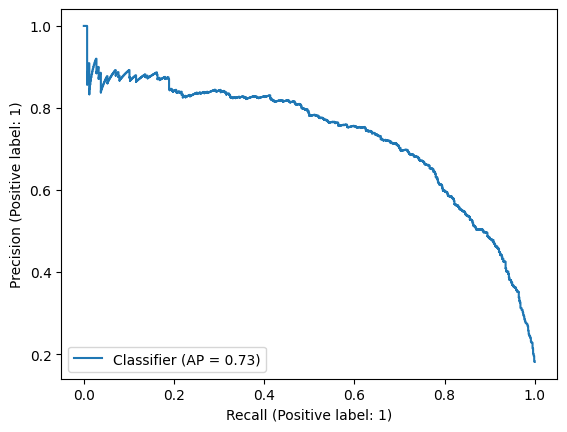

In [84]:
from scikitplot.metrics import plot_roc, plot_precision_recall


model = LinearSVC(C=0.01, class_weight='balanced')

model.fit(X_train_tf_idf, y_train)

decision_function = model.decision_function(X_test_count)
    
PrecisionRecallDisplay.from_predictions(y_test, decision_function)
plt.show();

In [85]:
y_pred = svc.predict(X_test_count)
svc_tf_idf_rec = recall_score(y_test, y_pred, labels = [1], average = None)
svc_tf_idf_f1 = f1_score(y_test, y_pred, labels = [1], average = None)
svc_tf_idf_AP = average_precision_score(y_test_dummies[1], decision_function)

## Random Forest

### Countvectorizer

In [86]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(100, max_depth = 5, random_state = 42, n_jobs = -1, class_weight='balanced') # class_weight="balanced"
rf.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, n_jobs=-1,
                       random_state=42)

In [87]:
print("RF MODEL")
eval(rf, X_train_count, X_test_count)

RF MODEL
[[3134  575]
 [ 138  682]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.84      0.90      3709
           1       0.54      0.83      0.66       820

    accuracy                           0.84      4529
   macro avg       0.75      0.84      0.78      4529
weighted avg       0.88      0.84      0.85      4529

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.85      0.90     14831
           1       0.55      0.86      0.67      3281

    accuracy                           0.85     18112
   macro avg       0.76      0.85      0.79     18112
weighted avg       0.89      0.85      0.86     18112



In [88]:
model = RandomForestClassifier(100, max_depth = 5, random_state = 42, n_jobs = -1, class_weight='balanced')
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.829230
train_accuracy     0.841376
test_precision     0.518366
train_precision    0.539179
test_recall        0.836338
train_recall       0.867148
test_f1            0.639799
train_f1           0.664688
dtype: float64

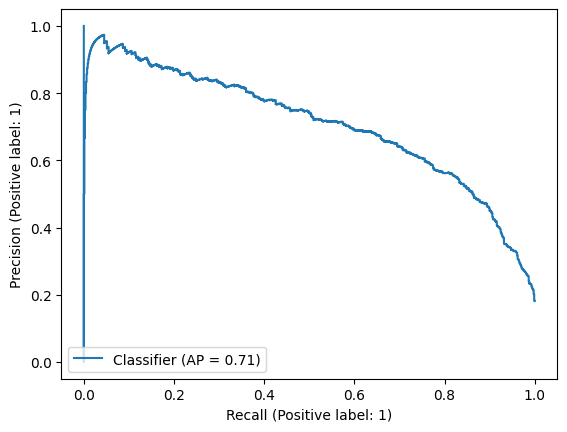

In [89]:
from scikitplot.metrics import plot_roc, plot_precision_recall

model = RandomForestClassifier(100, max_depth = 5, random_state = 42, n_jobs = -1, class_weight='balanced')

model.fit(X_train_count, y_train)

y_pred_proba = model.predict_proba(X_test_count)
    
PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba[:, 1])
plt.show();

In [90]:
y_pred = rf.predict(X_test_count)
rf_count_rec = recall_score(y_test, y_pred, labels = [1], average = None)
rf_count_f1 = f1_score(y_test, y_pred, labels = [1], average = None)
rf_AP = average_precision_score(y_test_dummies[1], y_pred_proba[:, 1])

### TF-IDF

In [91]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(100, max_depth = 5, random_state = 42, n_jobs = -1, class_weight='balanced') # class_weight="balanced"
rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, n_jobs=-1,
                       random_state=42)

In [92]:
X_train_tf_idf

<18112x5049 sparse matrix of type '<class 'numpy.float64'>'
	with 479308 stored elements in Compressed Sparse Row format>

In [93]:
print("RF MODEL")
eval(rf, X_train_tf_idf, X_test_tf_idf)

RF MODEL
[[3097  612]
 [ 142  678]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.83      0.89      3709
           1       0.53      0.83      0.64       820

    accuracy                           0.83      4529
   macro avg       0.74      0.83      0.77      4529
weighted avg       0.88      0.83      0.85      4529

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.84      0.90     14831
           1       0.54      0.86      0.66      3281

    accuracy                           0.84     18112
   macro avg       0.75      0.85      0.78     18112
weighted avg       0.89      0.84      0.85     18112



In [94]:
model = RandomForestClassifier(100, max_depth = 5, random_state = 42, n_jobs = -1, class_weight='balanced')
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.821722
train_accuracy     0.835891
test_precision     0.505374
train_precision    0.528736
test_recall        0.838461
train_recall       0.880118
test_f1            0.630425
train_f1           0.660354
dtype: float64

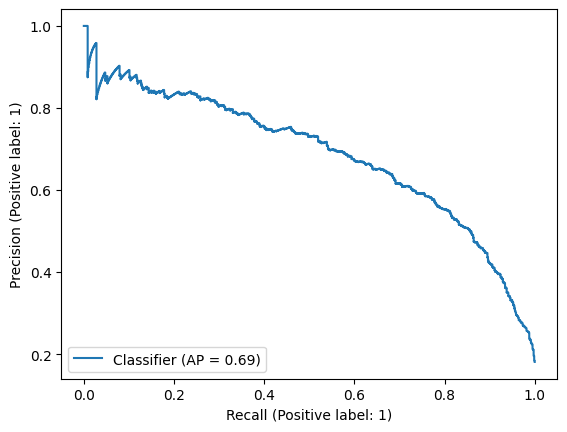

In [95]:
from scikitplot.metrics import plot_roc, plot_precision_recall

model = RandomForestClassifier(100, max_depth = 5, random_state = 42, n_jobs = -1, class_weight='balanced')

model.fit(X_train_tf_idf, y_train)

y_pred_proba = model.predict_proba(X_test_count)
    
PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba[:, 1])
plt.show();

In [96]:
y_pred = rf.predict(X_test_tf_idf)
rf_tf_idf_rec = recall_score(y_test, y_pred, labels = [1], average = None)
rf_tf_idf_f1 = f1_score(y_test, y_pred, labels = [1], average = None)
rf_tf_idf_AP = average_precision_score(y_test_dummies[1], y_pred_proba[:, 1])

## Ada Boosting

### Countvectorizer

In [97]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators= 500, random_state = 42)
ada.fit(X_train_count, y_train)

AdaBoostClassifier(n_estimators=500, random_state=42)

In [98]:
print("Ada MODEL")
eval(ada, X_train_count, X_test_count)

Ada MODEL
[[3537  172]
 [ 284  536]]
Test_Set
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      3709
           1       0.76      0.65      0.70       820

    accuracy                           0.90      4529
   macro avg       0.84      0.80      0.82      4529
weighted avg       0.90      0.90      0.90      4529

Train_Set
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     14831
           1       0.82      0.70      0.75      3281

    accuracy                           0.92     18112
   macro avg       0.88      0.83      0.85     18112
weighted avg       0.91      0.92      0.92     18112



In [99]:
model = AdaBoostClassifier(n_estimators= 500, random_state = 42)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.890680
train_accuracy     0.920851
test_precision     0.736160
train_precision    0.826504
test_recall        0.619640
train_recall       0.712689
test_f1            0.672386
train_f1           0.765379
dtype: float64

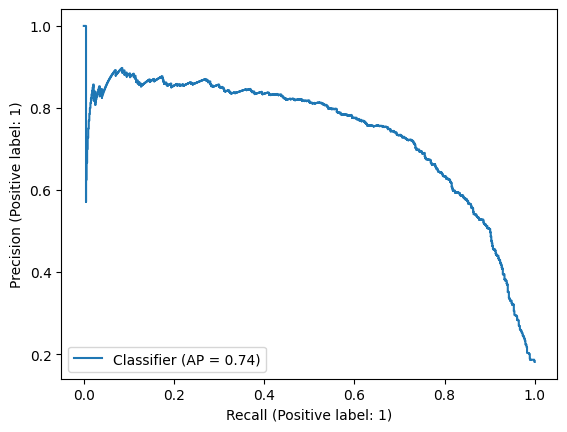

In [100]:
from scikitplot.metrics import plot_roc, plot_precision_recall

model = AdaBoostClassifier(n_estimators= 500, random_state = 42)

model.fit(X_train_count, y_train)

y_pred_proba = model.predict_proba(X_test_count)
    
PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba[:, 1])
plt.show();

In [101]:
y_pred = ada.predict(X_test_count)
ada_count_rec = recall_score(y_test, y_pred, labels = [1], average = None)
ada_count_f1 = f1_score(y_test, y_pred, labels = [1], average = None)
ada_AP = average_precision_score(y_test_dummies[1], y_pred_proba[:, 1])

### TF-IDF

In [102]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators= 500, random_state = 42)
ada.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(n_estimators=500, random_state=42)

In [103]:
print("Ada MODEL")
eval(ada, X_train_tf_idf, X_test_tf_idf)

Ada MODEL
[[3490  219]
 [ 288  532]]
Test_Set
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      3709
           1       0.71      0.65      0.68       820

    accuracy                           0.89      4529
   macro avg       0.82      0.79      0.80      4529
weighted avg       0.88      0.89      0.89      4529

Train_Set
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     14831
           1       0.84      0.76      0.80      3281

    accuracy                           0.93     18112
   macro avg       0.90      0.86      0.88     18112
weighted avg       0.93      0.93      0.93     18112



In [104]:
model = AdaBoostClassifier(n_estimators= 500, random_state = 42)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.884386
train_accuracy     0.935034
test_precision     0.711747
train_precision    0.857120
test_recall        0.608966
train_recall       0.769684
test_f1            0.656119
train_f1           0.811047
dtype: float64

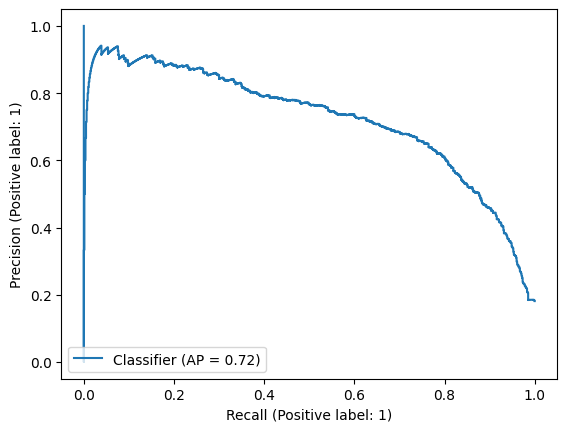

In [105]:
from scikitplot.metrics import plot_roc, plot_precision_recall

model = AdaBoostClassifier(n_estimators= 500, random_state = 42)

model.fit(X_train_tf_idf, y_train)

y_pred_proba = model.predict_proba(X_test_tf_idf)
    
PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba[:, 1])
plt.show();

In [106]:
y_pred = ada.predict(X_test_count)
ada_tf_idf_rec = recall_score(y_test, y_pred, labels = [1], average = None)
ada_tf_idf_f1 = f1_score(y_test, y_pred, labels = [1], average = None)
ada_tf_idf_AP = average_precision_score(y_test_dummies[1], y_pred_proba[:, 1])

## DL modeling

### Tokenization

In [107]:
num_words = 15001 # 1 fazlasını yazıyoruz. 

tokenizer = Tokenizer(num_words=num_words,) #filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n1234567890'

In [108]:
tokenizer.fit_on_texts(X)

### Creating word index

In [109]:
tokenizer.word_index


{'dress': 1,
 'love': 2,
 'fit': 3,
 'size': 4,
 'top': 5,
 'great': 6,
 'color': 7,
 'like': 8,
 'look': 9,
 'wear': 10,
 'im': 11,
 'fabric': 12,
 'would': 13,
 'small': 14,
 'cute': 15,
 'perfect': 16,
 'beautiful': 17,
 'really': 18,
 'flattering': 19,
 'little': 20,
 'ordered': 21,
 'one': 22,
 'soft': 23,
 'nice': 24,
 'comfortable': 25,
 'well': 26,
 'back': 27,
 'run': 28,
 'sweater': 29,
 'shirt': 30,
 'large': 31,
 'bought': 32,
 'bit': 33,
 'material': 34,
 'jean': 35,
 'pretty': 36,
 'much': 37,
 'work': 38,
 'length': 39,
 'short': 40,
 'also': 41,
 'quality': 42,
 'long': 43,
 'petite': 44,
 'skirt': 45,
 'got': 46,
 'pant': 47,
 'waist': 48,
 'medium': 49,
 'retailer': 50,
 'even': 51,
 'think': 52,
 'make': 53,
 'good': 54,
 'feel': 55,
 'x': 56,
 'tried': 57,
 'way': 58,
 'big': 59,
 'get': 60,
 'store': 61,
 'sleeve': 62,
 'super': 63,
 'usually': 64,
 'style': 65,
 'made': 66,
 'cut': 67,
 'could': 68,
 'summer': 69,
 'go': 70,
 'didnt': 71,
 'dont': 72,
 'right': 73

In [110]:
len(tokenizer.word_index)


12493

### Converting tokens to numeric

In [111]:
X_num_tokens = tokenizer.texts_to_sequences(X)


### Maximum number of tokens for all documents¶

In [112]:
num_tokens = [len(sen_tokens) for sen_tokens in X_num_tokens]
num_tokens = np.array(num_tokens)

In [113]:
num_tokens.max()

62

In [114]:
num_tokens.argmax() 

11957

In [115]:
np.percentile(sorted(num_tokens), q=96)

51.0

In [116]:
max_tokens = 62

### Fixing token counts of all documents (pad_sequences)

In [197]:
X_pad = pad_sequences(X_num_tokens, maxlen=max_tokens, padding="pre")

### Train Set Split

In [195]:
from sklearn.model_selection import train_test_split

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.1, stratify=y, random_state=42)

### Modeling

In [217]:
model = Sequential()

In [218]:
embedding_size = 100

In [219]:
model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size,
                    input_length=max_tokens))

# Embedding layer NLP modellerinde kullanılan bir layer olup 3 boyutlu bir tensörden oluşur. 
# 1'inci boyutu train setindeki toplam yorum sayısı.
# 2'inci boyutu her bir yorumun kaç tokenden oluştuğu (max_tokens).
# 3'üncü boyutu her bir tokene ait word embeddingin kaç elemanlı bir vektörden oluştuğu (embedding_size).
# Yorumlar numeric versiona dönüştürülürken corpusta en sık kullanılan ilk 15000 token kullanıldığından, hem train hem de predicit aşamasında sadece corpusta en sık
# geçen ilk 15000 token kullanılsın diye Embedding layera imput_dim = num_words düzenlemesini yapıyoruz.
# Eğer imput_dim'i 15.000'den daha küçük bir sayı yaparsanız (10000 gibi) o zaman model corpusta en sık kullanılan ilk 10000 token ile eğitim ve prediction yapar.

model.add(Dropout(0.2))

model.add(GRU(units=50, return_sequences=True))

# return_sequences=False modelin sadece son zaman adımındaki (t_n) hidden_state'i bir sonraki layera aktarır. defaultu False'dur.
# return_sequences= True,  modelin tüm zaman adımlarındaki (t_0, t_1, t_2 .....t_n gibi) tüm hidden_state'i bir sonraki LSTM, GRU layerlarına aktarır. Bu sayede  model tüm
# cümleyi aklında tutmaya çalışır. Bir LSTM/GRU layerından sonra yine bir LSTM/GRU layerı geliyorsa return_sequences=True olarak ayarlanmalıdır yoksa model hata döndürür. Ancak,
# sonraki layer dense layer ise return_sequences=False düzenlenmelidir aksi durumda model yine hata döndürür. Çünkü Dense layerlar sadece tek bir hidden_state ile çalışır.
model.add(Dropout(0.2)) 

model.add(GRU(units=25, return_sequences=True))
model.add(Dropout(0.2))
# sonraki layer GRU layer olduğundan return_sequences=True olarak düzenledik.

model.add(GRU(units=12, return_sequences=False))
# sonraki layer dense layer olduğundan return_sequences=False olarak düzenledik.


model.add(Dense(1, activation='sigmoid'))

In [220]:
optimizer = Adam(learning_rate=0.008)

In [221]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['Recall'])

In [222]:
model.summary() 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 62, 100)           1500100   
                                                                 
 dropout_44 (Dropout)        (None, 62, 100)           0         
                                                                 
 gru_6 (GRU)                 (None, 62, 50)            22800     
                                                                 
 dropout_45 (Dropout)        (None, 62, 50)            0         
                                                                 
 gru_7 (GRU)                 (None, 62, 25)            5775      
                                                                 
 dropout_46 (Dropout)        (None, 62, 25)            0         
                                                                 
 gru_8 (GRU)                 (None, 12)               

In [223]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_recall", mode="max", 
                           patience = 1, restore_best_weights=True)

In [224]:
from sklearn.utils.class_weight import compute_class_weight

compute_class_weight('balanced', classes=[0, 1], y=y_train)

array([0.61060833, 2.76022758])

In [225]:
weights = {0:0.61, 1:2.76}

In [226]:
model.fit(X_train, y_train, epochs=10, batch_size=512, class_weight=weights,   #sample_weight= classes_weights overfit varsa batch_size buyutulmeli
         validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/10
40/40 [==============================] - 16s 230ms/step - loss: 0.4406 - recall: 0.7982 - val_loss: 0.3161 - val_recall: 0.9098
Epoch 2/10
40/40 [==============================] - 6s 143ms/step - loss: 0.2487 - recall: 0.9309 - val_loss: 0.3489 - val_recall: 0.9146
Epoch 3/10
40/40 [==============================] - 7s 176ms/step - loss: 0.1849 - recall: 0.9523 - val_loss: 0.2868 - val_recall: 0.8293


### Model Evaluation

In [227]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,0.440611,0.798158,0.316120,0.909756
1,0.248707,0.930913,0.348924,0.914634
2,0.184922,0.952316,0.286847,0.829268


<Axes: >

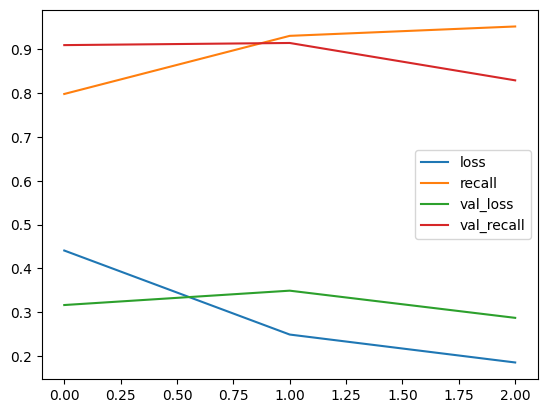

In [228]:
model_loss.plot()
# nlp ozelinde grafik uzerinden overfit degerlendirilmiyor. epoch sayisi az. test ve train skorlarini karsilastirarark asagidaki gibi yapacagiz.

In [229]:
model.evaluate(X_test, y_test)

71/71 [==============================] - 0s 7ms/step - loss: 0.3489 - recall: 0.9146


[0.3489239513874054, 0.9146341681480408]

In [230]:
model.evaluate(X_train, y_train)

637/637 [==============================] - 5s 7ms/step - loss: 0.2484 - recall: 0.9802


[0.24843928217887878, 0.9802221655845642]

In [231]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

y_pred = model.predict(X_test) >= 0.5

print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))

71/71 [==============================] - 1s 5ms/step
[[1566  289]
 [  35  375]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.84      0.91      1855
           1       0.56      0.91      0.70       410

    accuracy                           0.86      2265
   macro avg       0.77      0.88      0.80      2265
weighted avg       0.90      0.86      0.87      2265



In [232]:
y_train_pred = model.predict(X_train) >= 0.5

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

637/637 [==============================] - 3s 5ms/step
[[14712  1973]
 [   73  3618]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.88      0.93     16685
           1       0.65      0.98      0.78      3691

    accuracy                           0.90     20376
   macro avg       0.82      0.93      0.86     20376
weighted avg       0.93      0.90      0.91     20376



71/71 [==============================] - 0s 5ms/step


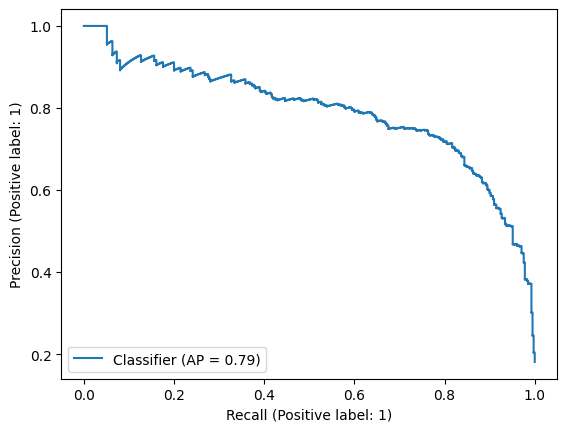

In [233]:
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt

y_pred_proba = model.predict(X_test)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)
plt.show();

In [234]:
from sklearn.metrics import precision_recall_curve, average_precision_score

average_precision_score(y_test, y_pred_proba)

0.7914634988261451

In [238]:
y_pred = model.predict(X_test) >= 0.5
dl_rec = recall_score(y_test, y_pred, labels = [1], average = None)
dl_f1 = f1_score(y_test, y_pred, labels = [1], average = None)
dl_AP = average_precision_score(y_test, y_pred_proba)
dl_rec,dl_f1,dl_AP

71/71 [==============================] - 1s 12ms/step


(array([0.91463415]), array([0.69832402]), 0.7914634988261451)

In [247]:
model.save('model_dl_sentiment.h5')

## BERT Modeling

In [138]:
import tensorflow as tf
import os

# Note that the `tpu` argument is for Colab-only
os.environ["CUDA_VISIBLE_DEVICES"] = "0" 

print("All devices: ", tf.config.list_logical_devices('GPU'))

All devices:  [LogicalDevice(name='/device:GPU:0', device_type='GPU')]


In [139]:
strategy = tf.distribute.OneDeviceStrategy('GPU')

In [140]:
!pip install transformers


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 62.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 31.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 122.0 MB/s eta 0:00:00


### Read Data

In [141]:
X = df['review'].values
y = df['recommended'].values

### Train test split

In [142]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

### Tokenization

In [143]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# Yukarıya linkini bıraktığım huggingface bert türk linkinden tokenizer ve model kurma işlemlemleri için gerekli olan kodları aynen
# alıp burada kullanabiliyoruz. 
# Tokenizer işlemleri için kullanacağımız kodu tokenizer diye bir değişkene atıyoruz.

### Fixing token counts of all documents

In [144]:
# For every sentence...
number_tokens_sentences = []
for sent in X:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    
    input_ids = tokenizer.encode(sent, add_special_tokens=True)
    number_tokens_sentences.append(len(input_ids))

print('Max sentence length: ', max(number_tokens_sentences))

# tokenizer.encode() fonksiyonunu sadece en uzun yorumun kaç tokenden oluştuğu bulmak ve tüm yorumları/textleri kaç
# tokene sabitliyeceğimize karar vermek için kullanacağız.

Max sentence length:  82


In [145]:
np.array(number_tokens_sentences).mean()

35.584691488891835

In [146]:
sum(np.array(number_tokens_sentences) <= 82) / len(number_tokens_sentences)

# tüm yorumları 82 tokene sabitlemeye karar veriyoruz.

1.0

In [159]:
max_token = 82

### Transformation Vectors to Matrices

In [147]:
# Elimizde tek bir yorum/text varken BERT modelleri 3 ayrı vektör (classificaiton problemleri için 2 ayrı vektör) olarak textin numeric versiona dönüştürülmesini
# ister. Ancak birden fazla yorum varsa artık olayın boyutu değişir. Ve vektörlerin biraraya gelmesiyle oluşan matrixler isterler.
# Problemimiz classification olduğundan token embeddings (input_ids), attention_mask vektörlerinden oluşan 2 ayrı matrix elde etmemiz gerekiyor.
# Bunun için öncelikle input_ids ve attention_mask için boş listeler oluşturup for döngüsüyle X'den tüm yorumları sırayla çekip bu yorumlardan elde ettiğimiz input_ids,
# attention_mask vektörlerini boş listeler içine append edip son aşamada bu listeleri array() fonksiyonu ile  (satır sayısı, sabitlediğimiz token sayısı) --> (len(X), 160) 
# boyutunda matrixlere dönüştürüyoruz.

def transformation(X):
  # set array dimensions
  seq_len = max_token

  # input_ids'ler için Xids boş listesini, attention_mask'ler için Xmask boş listesini oluşturuyoruz.
  Xids = []
  Xmask = []

    
  for sentence in X: # corpustan tüm yorumları sırayla çekiyoruz.

      tokens = tokenizer.encode_plus(sentence, max_length=seq_len, truncation=True,
                                      padding='max_length', add_special_tokens=True) 
      # çektiğimiz herbir yorumu(sentence) vektörlere dönüştürüyoruz.
      
      # assign tokenized outputs to respective rows in numpy arrays
      Xids.append(tokens['input_ids']) # her bir yoruma karşılık gelen input_ids vektörünü Xids listesine append ediyoruz.
      Xmask.append(tokens['attention_mask']) # her bir yoruma karşılık gelen attention_mask vektörünü Xmask append ediyoruz.

  return np.array(Xids), np.array(Xmask) # Xids ve Xmask matrixlerini (yorum sayısı, 160) daha hızlı çalışları için np.array formatına dönüştürüyoruz.

In [148]:
Xids_train, Xmask_train = transformation(X_train)

# Train setimiz için 2 ayrı matriximizi düzenliyoruz.

Xids_test, Xmask_test = transformation(X_test)
# Test setimiz için de 2 ayrı matriximizi düzenliyoruz.

In [149]:
print("Xids_train.shape  :", Xids_train.shape)
print("Xmask_train.shape :", Xmask_train.shape)
print("Xids_test.shape   :", Xids_test.shape)
print("Xmask_test.shape  :", Xmask_test.shape)

Xids_train.shape  : (20376, 82)
Xmask_train.shape : (20376, 82)
Xids_test.shape   : (2265, 82)
Xmask_test.shape  : (2265, 82)


In [150]:
labels_train = y_train.reshape(-1,1)
labels_train

# BERT modelleri target'ı da bir matrix olarak ister. Bu sebeple y_train targetımızı (len(y_train), 1) boyutunda bir matrix'e dönüştürüyoruz.

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [151]:
labels_test = y_test.reshape(-1,1)
labels_test

# BERT modelleri target'ı da bir matrix olarak ister. Bu sebeple y_train targetımızı (len(y_train), 1) boyutunda bir matrix'e dönüştürüyoruz.
# -1 matris boyutunu otomatik hesapliyor. -1 yazmasaydik 219147 yazmamiz gerekirdi.

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

### Transformation Matrix to Tensorflow tensor

In [152]:
import tensorflow as tf

dataset_train = tf.data.Dataset.from_tensor_slices((Xids_train, Xmask_train, labels_train))
dataset_train

# Datayı BERT modellerine vermeden önceki son aşama yukarıda elde ettiğimiz matrixleri gruplandırılmış Tensorflow tensörlerine dönüştürmektir.
# Bir tensor, bir veya daha fazla boyutta veri topluluğunu ifade eden bir matematiksel yapıdır. Tek boyutlu tensör vektör olarak, 2 boyutlu tensör matrix olarak, 
# 3 ve daha büyük boyuttaki tensörler ise yüksek boyutlu tensörler olarak ifade edilir.

# Tensorflow  tensörleri GPU/TPU gibi donanımların daha hızlı çalışmasını veya paralel işleme gibi işlemlerin daha effektif yapılmasını sağlar. 
# TensorFlow tensörleri, TensorFlow kütüphanesi tarafından sağlanan otomatik türev alma özelliklerini de kullanabilir. Ancak numpy.array() bu işlemleri sağlayamadığı 
# için Tesorflow kütüphanesi ile Tensörlere dönüştürüyoruz.

# Ayrıca, tf.data.Dataset.from_tensor_slices fonksiyonu, Xids_train, Xmask_train, labels_train matrislerini gruplandırılmış tensörler haline getirir. Model böylece bu 3 tensörün
# aynı veriyi temsil ettiğini anlayacaktır.

# Bu kapsamda, train datası için yukarıda elde ettiğimiz 3 ayrı matrix'mizi de gruplandırılmış Tensorflow tensörlerine dönüştüreceğiz. 

<_TensorSliceDataset element_spec=(TensorSpec(shape=(82,), dtype=tf.int64, name=None), TensorSpec(shape=(82,), dtype=tf.int64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [153]:
dataset_test = tf.data.Dataset.from_tensor_slices((Xids_test, Xmask_test, labels_test))
dataset_test

# Train datasına yaptığımız gibi test datası için de 3 ayrı matrix'mizi gruplandırılmış Tensorflow tensörlerine dönüştüreceğiz.

<_TensorSliceDataset element_spec=(TensorSpec(shape=(82,), dtype=tf.int64, name=None), TensorSpec(shape=(82,), dtype=tf.int64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [154]:
def map_func(Tensor_Xids, Tensor_Xmask, Tensor_labels):
    # we convert our three-item tuple into a two-item tuple where the input item is a dictionary
    return {'input_ids': Tensor_Xids, 'attention_mask': Tensor_Xmask}, Tensor_labels
  
# Yukarıda elde ettiğimiz tensörlerden hangisi 'input_ids' hangisi 'attention_mask' ve hangisi labels model bunları bilemez. Bu sebeple
# bu bilgiyi bizim modele sağlamamız gerekiyor. Bunun için yukarıdaki fonksiyonu tanımlıyoruz.
# süslü parantez içerisine 'input_ids' ve  'attention_mask' tanımlamamızı yapıyoruz. Labels'ı süslü parantez dışarısında bırakıyoruz.

In [155]:
# then we use the dataset map method to apply this transformation
dataset_train = dataset_train.map(map_func)
dataset_test = dataset_test.map(map_func) 

# yukarıda tanımladığımız fonksiyonu map ile tüm train ve test datasına uyguluyoruz.
# dataset_train.map(map_func) ve dataset_test.map(map_func) şeklinde de dönüşümler yapılır. 

### Batch Size

In [156]:
batch_size = 32

# BERT modeli geliştiren developerlar tarafından batch_size olarak 16 ve 32 sayıları tavsiye edilmiştir.

# batch_size 
# fit into a batch of 32
train_ds = dataset_train.batch(batch_size)
val_ds = dataset_test.batch(batch_size)

# Yukarıda elde ettiğimiz gruplandırılmış tensörleri kaçarlı paketler halinde modele vereceğimizi belirliyoruz. Bu işlemi batch() fonksiyonu ile yapıyoruz.
# 32'li paketler halinde modele verilmesini istiyoruz. hem train hem de test datasına uyguluyoruz.

### Creating optimization

In [157]:
!pip install -q tf-models-official

In [158]:
from official.nlp import optimization
epochs = 3
#batch_size = 32
steps_per_epoch = len(train_ds)

num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 2e-5  # 3e-5, 5e-5
optimizer= optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')  

# Num_warmup_steps (ısınma adım sayısı), bir optimizasyon işleminde, modelin eğitim sürecinde kullanılacak olan optimizatörün öğrenme oranının (learning rate) nasıl 
# belirleneceğini belirler. Öğrenme oranı, modelin eğitim sürecinde ne kadar hızlı öğreneceğini ve güncelleyeceğini belirler. Öğrenme oranının çok yüksek olması, modelin
# eğitim sürecinde hızlı öğrenmesine neden olabilir, ancak aynı zamanda modelin overfitting riskini de artırabilir. Öğrenme oranının çok düşük olması ise, modelin eğitim
# sürecinde çok yavaş öğrenmesine neden olabilir.

# Num_warmup_steps, modelin eğitim sürecinde optimizatörün öğrenme oranının, eğitim sürecinin başlangıcında düşük olmasını ve eğitim süreci ilerledikçe yavaş yavaş 
# yükselmesini sağlar. Bu sayede, modelin eğitim sürecinde daha düşük bir oranda hata yapma riski vardır ve modelin eğitim süreci daha düzenli ilerler. Bu da modelin 
# daha iyi bir performans göstermesini sağlar. 


# steps_per_epoch bir epochun kaç adımda tamamlanacağını gösterir. len(train_ds) = 6849 --> len(train_ds) sayısı train_datasının kaç tane 32'li paketlerden/adımlardan 
# oluştuğunu gösterir.
# ÖNEMLİ NOT: train datalarındaki son paketler/adımlar  32'den daha az gözlemden oluşabilir. Mesela bu train_ds datamızın son paketinde/adımında 11 gözlem vardır. 
# Ancak, 32'den daha az gözlem olsa da biz yinede bunları bir paket/adım olarak sayıyoruz.

# num_train_steps, eğitimin toplamda kaç adımda tamamlanacağını gösterir. Eğitim 3 epochda tamamlanacağı için steps_per_epoch(len(train_ds)) * epochs --> 6849 * 3 = 20547
# num_warmup_steps, num_train_steps'in %10'u (20547x0.1 = 2054) olacak şekilde alınması tavsiye edilmiştir. Ancak bu oranı biraz daha azaltıp/artırarak skorlarınızı 
# gözlemleyebilirsiniz. num_warmup_steps'in 2054 olması şu anlama geliyor. Model eğitime başladığında optimization.create_optimizer fonksiyonunun içine verdiğimiz 2e-5 
# öğrenme oranı ile direk eğitime başlamaz. 
# Eğitimin ilk 2054 adımında öğrenme oranı 0 ile 2e-5 arasında olacak şekilde kademeli olarak yavaş yavaş artırılır ve 2054'üncü adımdan sonra eğitim 2e-5 oranı ile devam eder.
# Bu sayede modelin eğitim sürecinde daha düşük bir oranda hata yapma riski vardır ve modelin eğitim süreci daha düzenli ilerler. Bu da modelin daha iyi bir performans 
# göstermesini sağlar. 

# Dikkat ederseniz burda AdamW (Adam with Weight Decay) optimizatörünü kullandık. AdamW, Adam optimizatörüne ek olarak, ağırlık azaltma (weight decay) özelliği de içerir. 
# Ağırlık azaltma, modelin ağırlıklarının eğitim sürecinde daha az değişmesini sağlar ve bu sayede overfitting riskini azaltır.

# BERT modellerinde developerların tavsiye ettiği öğrenme oranları 2e-5, 3e-5 ve 5e-5'dir.
# BERT modellerinde developerların tavsiye ettiği epoch sayısı 2 veya 3'dür. Daha büyük sayılar overfitinge sebep olur. 
# Deneme yanılma ile hangi öğrenme oranlarının ve epoch sayılarının daha iyi sonuçlar verdiğini gözlemlememiz gerekiyor.

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


### Creating Model with GPU

In [160]:
def create_model():
    from transformers import TFAutoModel
    # BERTTürk modeli sadece pytorch tensörleri üzerinden eğitildiğinden modelin Tensorflow kütüphanesi ile çalışabilmesi için AutoModel yerine TFAutoModel yazıyoruz.
    from tensorflow.keras.layers import Input, Dropout, Dense, BatchNormalization
    from tensorflow.keras import Model

    model = TFAutoModel.from_pretrained("bert-base-uncased") 
    # Notebookta yeralan huggingface bert türk linkinden model kurma işlemlemleri için gerekli olan kodları aynen alıyoruz.
    # Tokenization işlemleri "dbmdz/bert-base-turkish-uncased" ile yapıldığından eğitimide "dbmdz/bert-base-turkish-uncased" ile yapmamız gerekiyor. 
    # "dbmdz/bert-base-turkish-cased" ile eğitim yapılırsa sonuçlarımız kötü çıkacaktır.

    input_ids = Input(shape=(max_token,), name='input_ids', dtype='int32')
    attention_mask = Input(shape=(max_token,), name='attention_mask', dtype='int32')
    # inputlarımız token embeddings (input_ids) ve attention_mask'den oluştuğundan herbiri için bir input layer oluşturuyoruz.
    # Her bir gözlem için input layerlarımızın boyutlarını (shape= (160,)) veriyoruz.
    # modelin bu layerları birbirinden ayırt edebilmesi için name olarak map_func fonksiyonu içinde belirlediğimiz isimleri kullanıyoruz. Farklı isimler kullanılırsa model 
    # hata döndürür.
    # BERT modelleri dtype= "int32" olarak çalışır. Bu sebeple dtype="int32" olarak belirtiyoruz.

    embeddings = model.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"] #[1]
    # embeddings layer, BERT model üzerinde daha önce eğitilip hafızasında tutulan word embeddingleri çektiğimiz katmandır.
    # Çekilen Word embeddingler birleştirilerek sentence embeddinglere dönüştürülür. 
    # Elde ettiğimiz sentence embeddinglerin olumlu mu olumsuz mu olduğuna dair eğitimimizi Dense layer üzerinde yapacağız.

    x = Dense(max_token, activation='relu')(embeddings)
    x = BatchNormalization()(x)
    x = Dropout(0.1)(x) #0.1 oranı developerlar tarafından tavsiye edilen orandır.
    y = Dense(1, activation='sigmoid', name='outputs')(x) # outputumuz döndürüyor.

    # Dikkat ettiyseniz burda Sequential API yerine Functional API kullanıyoruz. 
    # Functional API'de bir önceki layerdaki bilgileri bir sonraki layera aktarma işlemini aktarma yapacağımız layerdan sonra bir tuple açıp içerisine bir önceki layerın ismini 
    # yazarak yapıyoruz.
    # Embeddings layerdan elde ettiğimiz sentence embeddingsleri Dense layer'a göndermek için Dense() layerdan sonra bir tuple açıp içerisine bir önceki layerın ismini yazıyoruz
    # Aynen burda olduğu gibi "Dense(160, activation='relu')(embeddings)". Bu sayede embeddings layerdaki bilgiler Dense layera aktarılmış oldu.
    # Hatırlarsanız bu işlem Sequential API'de model.add(embeddings) olarak yapılıyordu.

    return Model(inputs=[input_ids, attention_mask], outputs=y)
    # son aşamada elde ettiğimiz input ve outputlar Model fonksiyonu içine tanımlanır.

# modeli bir fonksiyon içinde kurma sebebimiz aşağıdaki strategy.scope() kapsamında yapacağımız işlemlerin daha sade görünmesi için yoksa burdaki tüm kodları strategy.scope() 
# altında yazmamız gerekecekti.

In [161]:
# strategy değişkenine atanan 8 TPU çekirdeğinin hızından faydalanarak yapmak istediğimiz tüm işlemleri with strategy.scope() kod bloğunun 
# altında tanımlıyoruz.

with strategy.scope():

  #from tensorflow.keras.optimizers import Adam
  from tensorflow.keras.losses import BinaryCrossentropy
  from tensorflow.keras.metrics import Recall
  
  #optimizer = Adam(learning_rate=2e-5) ==> yukarıda tanımladığımız optimizer'ı kullanmasaydık bu şekilde de optimizer'ı tanımlayabilirdik. 
  # Ama çok rahat overfiting olma riski vardır
  loss = BinaryCrossentropy()
  recall = Recall()
  model3 = create_model()
  model3.compile(optimizer=optimizer, loss=loss, metrics=[recall])

  # Aşağıda çıkan uyarı önemli değildir. Classification tasklerinde modelin eğitim aşamasında Next Sentence Prediction(NSP) katmanını kullanmayacağı
  # bilgisi veriliyor.

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [162]:
model3.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 82)]         0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 82)]         0           []                               
                                                                                                  
 bert (TFBertMainLayer)         TFBaseModelOutputWi  109482240   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 82,                                            

### Model Fiting

In [163]:
model3.fit(train_ds, validation_data= val_ds, epochs=epochs)

Epoch 1/3
637/637 [==============================] - 422s 587ms/step - loss: 0.5271 - recall: 0.7356 - val_loss: 0.3189 - val_recall: 0.6024
Epoch 2/3
637/637 [==============================] - 367s 576ms/step - loss: 0.3403 - recall: 0.7540 - val_loss: 0.3655 - val_recall: 0.7220
Epoch 3/3
637/637 [==============================] - 374s 587ms/step - loss: 0.2494 - recall: 0.8093 - val_loss: 0.4674 - val_recall: 0.7707


### Model evaluation

In [164]:
model_loss = pd.DataFrame(model3.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,0.527140,0.735573,0.318881,0.602439
1,0.340315,0.753996,0.365543,0.721951
2,0.249366,0.809266,0.467411,0.770732


<Axes: >

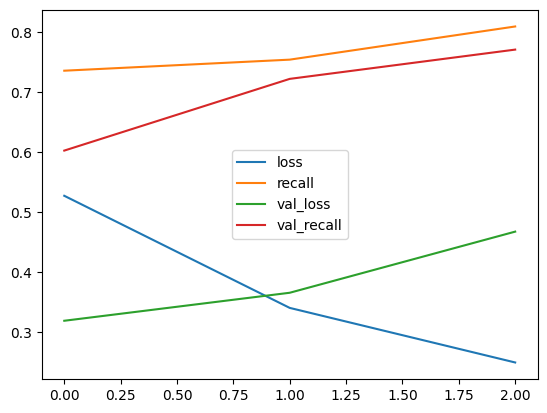

In [165]:
model_loss.plot()


In [166]:
model3.evaluate(train_ds)

637/637 [==============================] - 125s 195ms/step - loss: 0.1723 - recall: 0.8415


[0.17231634259223938, 0.8415063619613647]

In [167]:
model3.evaluate(val_ds)

71/71 [==============================] - 14s 192ms/step - loss: 0.4674 - recall: 0.7707


[0.4674105644226074, 0.7707316875457764]

In [168]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model3.predict(val_ds) >= 0.5


print(classification_report(y_test, y_pred))

71/71 [==============================] - 17s 202ms/step
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1855
           1       0.81      0.77      0.79       410

    accuracy                           0.92      2265
   macro avg       0.88      0.86      0.87      2265
weighted avg       0.92      0.92      0.92      2265



In [169]:
y_train_pred = model3.predict(train_ds) >= 0.5


print(classification_report(y_train, y_train_pred)) 

637/637 [==============================] - 122s 191ms/step
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     16685
           1       0.93      0.84      0.88      3691

    accuracy                           0.96     20376
   macro avg       0.95      0.91      0.93     20376
weighted avg       0.96      0.96      0.96     20376



71/71 [==============================] - 15s 208ms/step


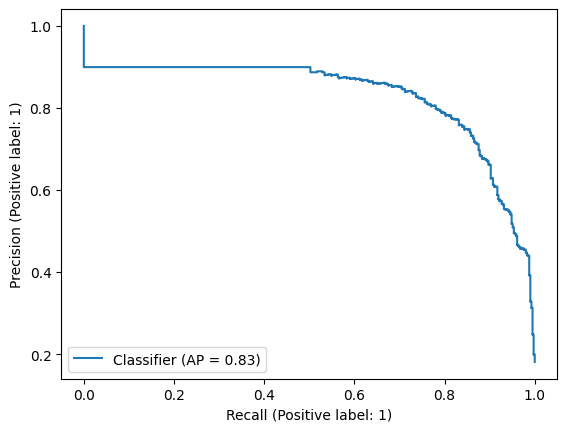

In [174]:
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt

y_pred_proba = model3.predict(val_ds)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)
plt.show();

In [190]:
y_pred = model3.predict(val_ds) >= 0.5
bert_rec = recall_score(y_test, y_pred, labels = [1], average = None)
bert_f1 = f1_score(y_test, y_pred, labels = [1], average = None)
bert_AP = average_precision_score(y_test, y_pred_proba)
bert_rec,bert_f1,bert_AP

71/71 [==============================] - 15s 206ms/step


(array([0.77073171]), array([0.78802993]), 0.8301967884134992)

In [246]:
model3.save_weights("/content/drive/MyDrive/clarusway-dl/sentiment_model_bert.h5")

### Compare Models F1 Scores, Recall Scores and Average Precision Score

In [239]:
compare = pd.DataFrame({"Model": ["NaiveBayes_count", "LogReg_count", "SVM_count", "Random Forest_count", 
                                  "AdaBoost_count", "NaiveBayes_tfidf", "LogReg_tfidf", "SVM_tfidf", 
                                  "Random Forest_tfidf", "AdaBoost_tfidf",'DL','Bert'],
                        
                        "F1_Score": [nb_count_f1[0], log_count_f1[0], svc_count_f1[0],
                                             rf_count_f1[0], ada_count_f1[0], nb_tf_idf_f1[0], log_tf_idf_f1[0],
                                             svc_tf_idf_f1[0], rf_tf_idf_f1[0], ada_tf_idf_f1[0], dl_f1[0], bert_f1[0]],
                        
                        "Recall_Score": [nb_count_rec[0], log_count_rec[0], svc_count_rec[0], 
                                                  rf_count_rec[0], ada_count_rec[0], 
                                                  nb_tf_idf_rec[0], log_tf_idf_rec[0], svc_tf_idf_rec[0], 
                                                  rf_tf_idf_rec[0], ada_tf_idf_rec[0], dl_rec[0], bert_rec[0]],
                        
                        "Average_Precision_Score": [nb_AP, log_AP, svc_AP, rf_AP,
                                                          ada_AP, nb_tf_idf_AP, log_tf_idf_AP, svc_tf_idf_AP,
                                                          rf_tf_idf_AP, ada_tf_idf_AP, dl_AP, bert_AP]})

compare

,Model,F1_Score,Recall_Score,Average_Precision_Score
0,NaiveBayes_count,0.721035,0.781707,0.759878
1,LogReg_count,0.710448,0.870732,0.770457
2,SVM_count,0.727181,0.874390,0.776010
3,Random Forest_count,0.656716,0.831707,0.707153
4,AdaBoost_count,0.701571,0.653659,0.739045
5,NaiveBayes_tfidf,0.721035,0.781707,0.743992
6,LogReg_tfidf,0.667907,0.875610,0.759150
7,SVM_tfidf,0.708934,0.750000,0.731111
8,Random Forest_tfidf,0.642654,0.826829,0.686953
9,AdaBoost_tfidf,0.591463,0.591463,0.721982


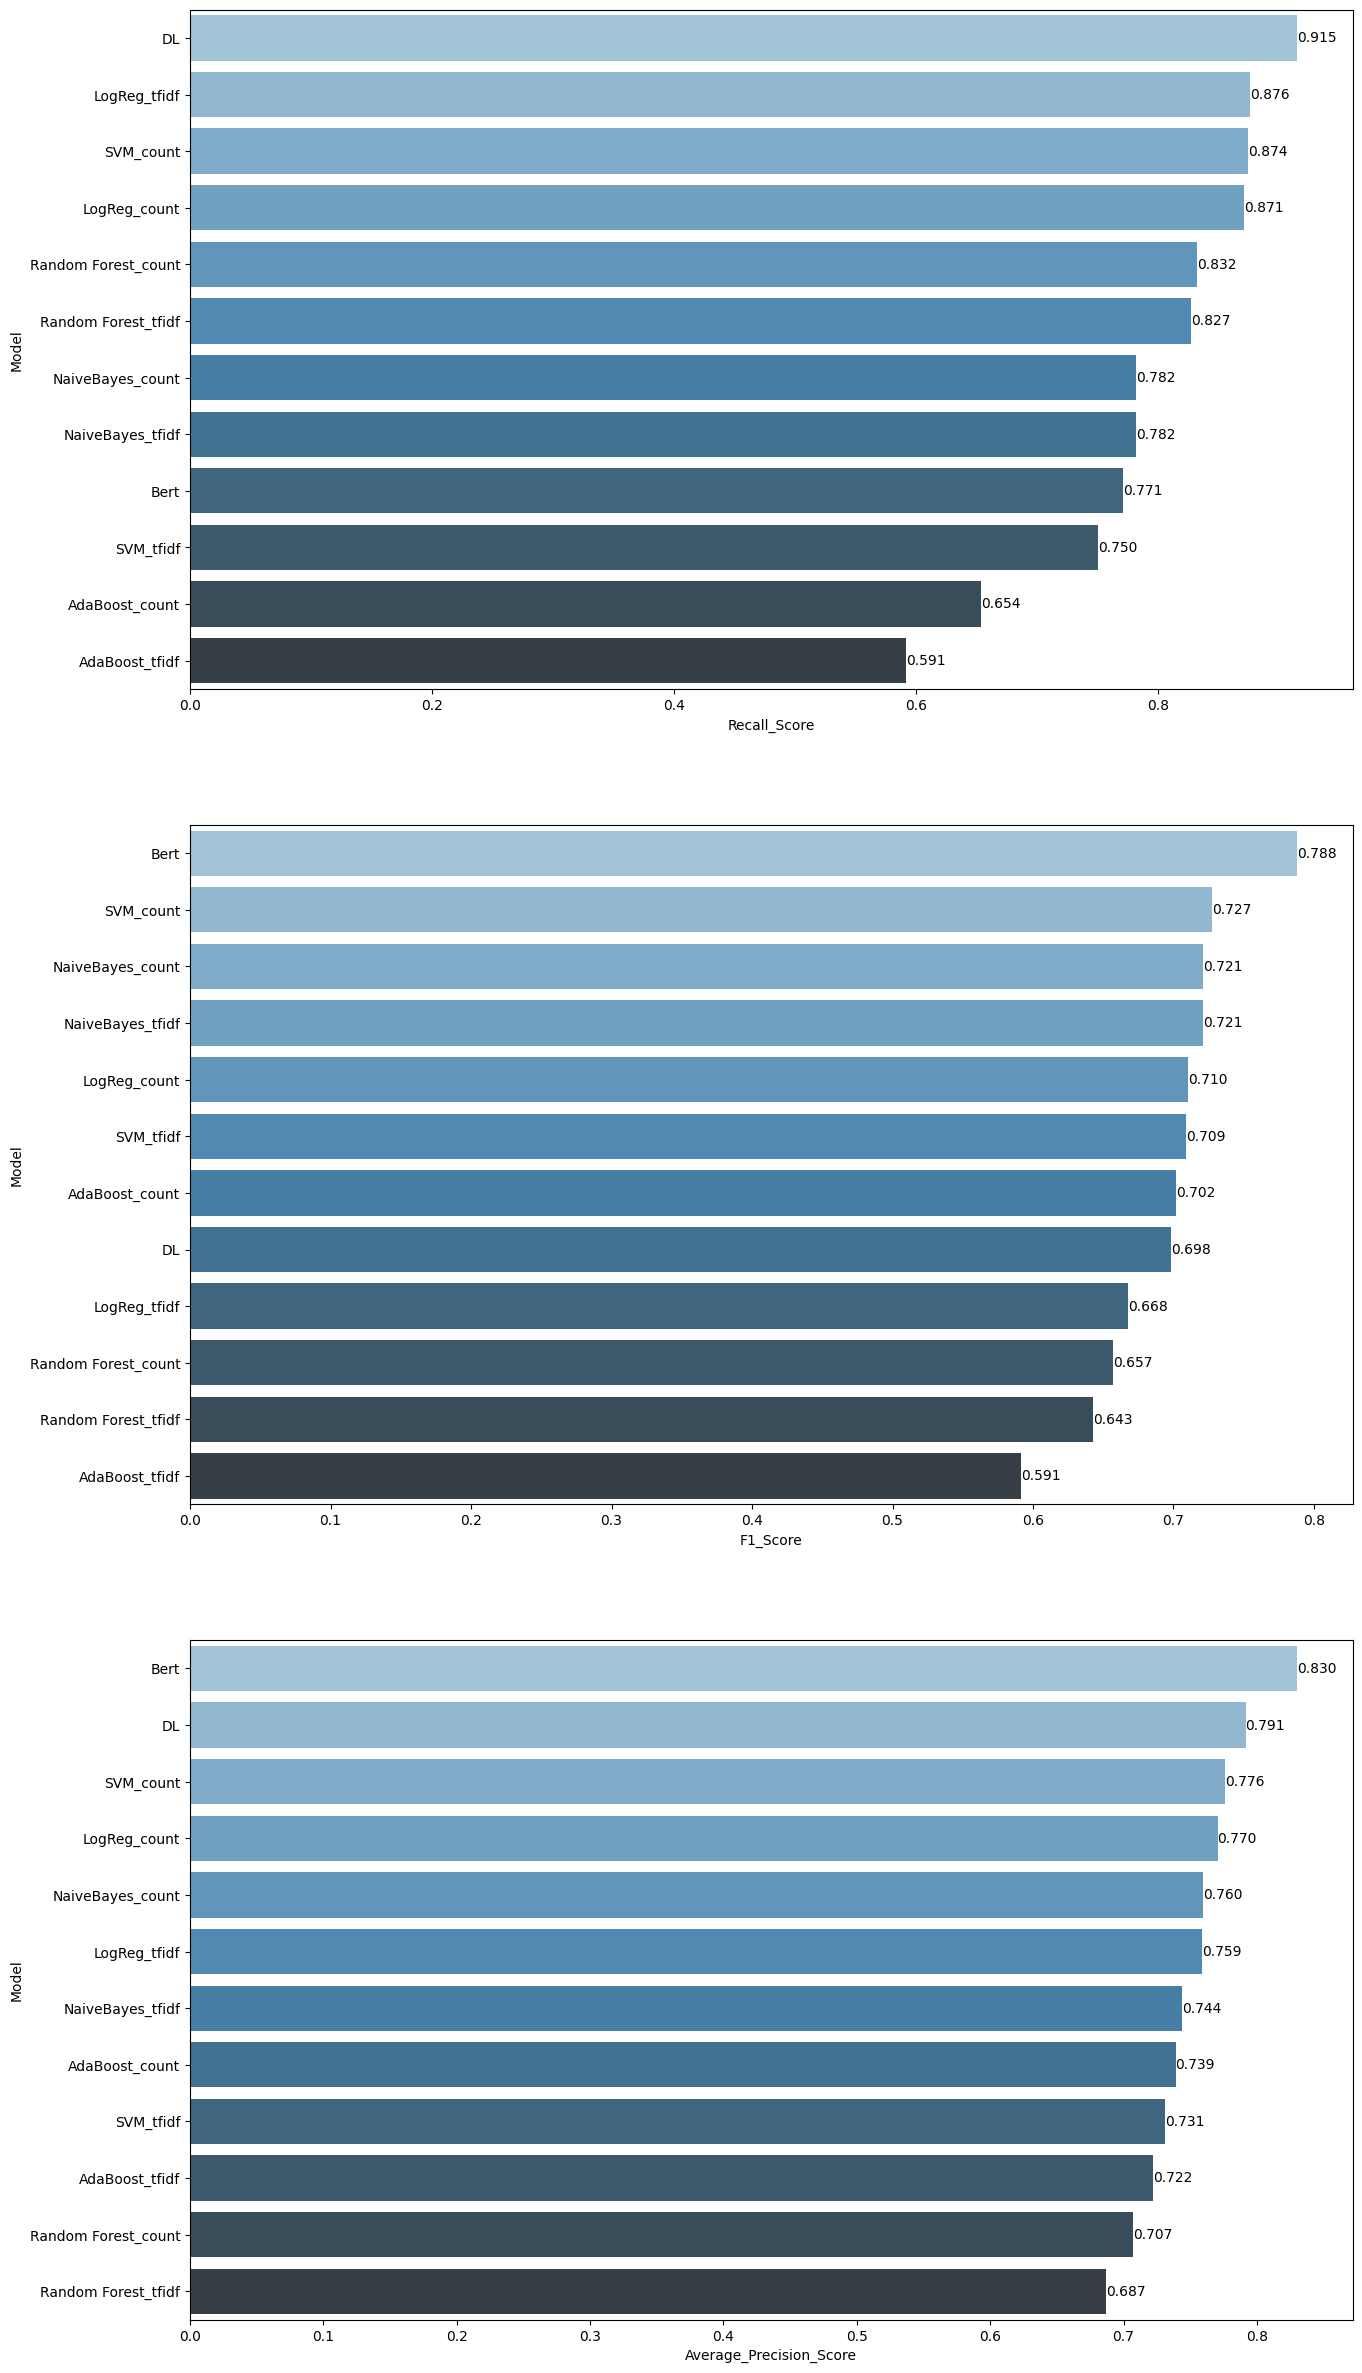

In [243]:
plt.figure(figsize=(15,30))
plt.subplot(311)
compare = compare.sort_values(by="Recall_Score", ascending=False)
ax=sns.barplot(x="Recall_Score", y="Model", data=compare, palette="Blues_d")            
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="F1_Score", ascending=False)
ax=sns.barplot(x="F1_Score", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")


plt.subplot(313)
compare = compare.sort_values(by="Average_Precision_Score", ascending=False)
ax=sns.barplot(x="Average_Precision_Score", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.show();

# hernekadar RF ve NB recall scorları daha yüksek olsa da F1 scorları daha düşük buda bize bu modellerin precision
# scorlarının logreg veya SVM'ye nispeten daha düşük olduğunu gösterir.

# Bizim için tekbaşıan recall'un çok yüksek olması önemli değil. Recall ile birlikte precisionın da olabildiğince yüksek
# olması gerekli. Bu sebeple logreg tf-idf ile devam edeceğiz.

### Conclusion

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___